# Trying to reproduce

![](https://www.ewoce.org/gallery/A17_OXYGEN.gif)

https://cchdo.ucsd.edu/search?q=WOCE

https://cchdo.ucsd.edu/cruise/3230CITHER2_1



In [9]:
import io
import requests
import pandas as pd


url = "https://cchdo.ucsd.edu/data/12686/323019940104_hy1.csv"
with requests.get(url) as r:
    lines = r.content.decode().splitlines()

header = lines[37].strip().split(",")
units = lines[38].strip().split(",")

with io.StringIO("\n".join(lines[39:-1])) as f:
    df = pd.read_csv(
        f,
        names=header,
        na_values=-999,
        engine="python",
        
    )

df

,EXPOCODE,SECT_ID,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,DATE,TIME,LATITUDE,LONGITUDE,...,PH_TOT,PH_TOT_FLAG_W,PH_TMP,TRITUM,TRITUM_FLAG_W,HELIUM,HELIUM_FLAG_W,DELHE3,DELHE3_FLAG_W,THETA
0,323019940104,A17,1,1,32,2,19940108,0,-46.826,-53.714,...,NaN,9,NaN,NaN,9,NaN,9,NaN,9,14.8226
1,323019940104,A17,1,1,31,2,19940108,0,-46.826,-53.714,...,NaN,9,NaN,NaN,9,NaN,9,NaN,9,2.6704
2,323019940104,A17,1,1,30,2,19940108,0,-46.826,-53.714,...,NaN,9,NaN,NaN,9,NaN,9,NaN,9,2.2111
3,323019940104,A17,1,1,25,2,19940108,0,-46.826,-53.714,...,NaN,9,NaN,NaN,9,NaN,9,NaN,9,1.6592
4,323019940104,A17,1,1,17,2,19940108,0,-46.826,-53.714,...,NaN,9,NaN,NaN,9,NaN,9,NaN,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777,323019940104,A17,235,1,21,2,19940320,0,5.887,-51.504,...,8.043,2,25.0,NaN,9,NaN,9,NaN,9,24.0058
6778,323019940104,A17,235,1,20,2,19940320,0,5.887,-51.504,...,7.933,2,25.0,NaN,9,NaN,9,NaN,9,18.9288
6779,323019940104,A17,235,1,19,2,19940320,0,5.887,-51.504,...,7.881,2,25.0,NaN,9,NaN,9,NaN,9,16.6880
6780,323019940104,A17,235,1,18,2,19940320,0,5.887,-51.504,...,7.815,2,25.0,NaN,9,NaN,9,NaN,9,13.6145


- Segment a: Transit de Montévidéo à la fin de la station 3.
- Segment b: Début de la station 41 à la fin de la station 43.
- Segment c: Début de la station 43 à la fin de la station 58.
- Segment d: Début de la station 115 à Salvador de Bahia.
- Segment e: De Salvador de Bahia au début de la station 141.
- Segment f: Début de la station 150 à Récife.
- Segment g: De Récife à la fin de la station 15 1.
- Segment h1: Début de la station 2 10 à la fin de la station 212.
- Segment h2: Début de la station 212 à Cayenne.
- Segment i: Grande section a17, complément des segments précedents.

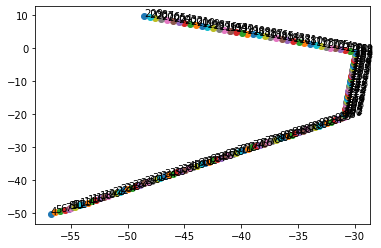

In [10]:
# %matplotlib notebook
import matplotlib.pyplot as plt


remove_stations = (
    list(range(1, 3+1)) # segment a
    + list(range(41, 43+1)) # segment b
    + list(range(43, 58+1))  # segment c
    + list(range(115, 141+1)) # segment d
    + list(range(210, 235+1))  # segment h1/h2
)

groups = df.groupby("STNNBR")
fig, ax = plt.subplots()

for k, g in groups:
    if k not in remove_stations:
        ax.plot(g["LONGITUDE"].iloc[0], g["LATITUDE"].iloc[0], "o")
        ax.text(g["LONGITUDE"].iloc[0], g["LATITUDE"].iloc[0], s=str(k))

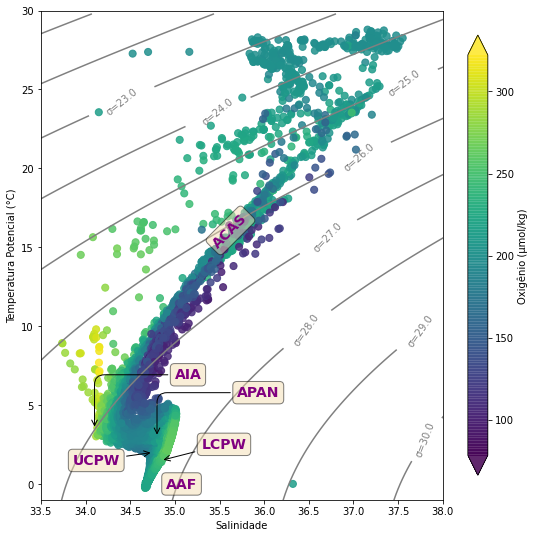

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gsw


fig, ax = plt.subplots(figsize=(9, 9))
s = ax.scatter(df["SALNTY"], df["THETA"], s=50, c=df["OXYGEN"], alpha=0.85)

ax.set_xlabel("Salinidade")
ax.set_ylabel("Temperatura Potencial (°C)")
cbar = fig.colorbar(s, extend="both", shrink=0.9)
cbar.set_label("Oxigênio (µmol/kg)")


npt = 100
smin, smax, tmin, tmax = min(df["SALNTY"]), max(df["SALNTY"]), min(df["THETA"]), max(df["THETA"])
T = np.linspace(tmin-1, tmax+1, npt)
S = np.linspace(smin-1, smax+1, npt)
Tg, Sg = np.meshgrid(T, S)
sigma_theta = gsw.sigma0(Sg, Tg)

cs = ax.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1, levels=12)
ax.clabel(cs, fmt=r"σ=%.1f")

kw = {"fontsize": 14, "fontweight": "black", "color": "purple"}
props = {"boxstyle": "round", "facecolor": "wheat", "alpha": 0.5}
arrowprops = {
    "arrowstyle": "->",
    "connectionstyle": "angle,angleA=0,angleB=90,rad=10"
}



offset = 40
def annotate(ax, x, y, text, xytext=(2*offset, offset), arrowprops=arrowprops):
    ax.annotate(
        text,
        (x, y),
        xytext=xytext,
        textcoords="offset points",
        bbox=props,
        arrowprops=arrowprops,
        **kw,
    )


ax.text(35.4, 15, "ACAS", bbox=props, rotation=45, **kw)
annotate(ax, 34.1, 3.5, "AIA", xytext=(2*offset, 1.25*offset))
annotate(ax, 34.8, 3, "APAN")
ax.text(34.9, -0.25, "AAF", bbox=props, **kw)
annotate(ax, 34.85, 1.5, "LCPW", xytext=(offset, 0.3*offset), arrowprops={"arrowstyle": "->"})
annotate(ax, 34.75, 2, "UCPW", xytext=(-2*offset, -0.3*offset), arrowprops={"arrowstyle": "->"})


ax.axis([33.5, 38, -1, 30])
fig.savefig("A17-TS.png")
fig.savefig("A17-TS.svg")

In [12]:
from functools import reduce


groups = df.groupby("STNNBR")


oxygen = {}
depths = []
latitudes = []
longitudes = []

for station in set(df["STNNBR"]):
    # Remove the coastal trips checked with the commented plot above.
    if station not in remove_stations:
        lat, lon, depth =  groups.get_group(station)[["LATITUDE", "LONGITUDE", "DEPTH"]].iloc[0]
        oxy = groups.get_group(station)[["CTDPRS", "OXYGEN"]].set_index("CTDPRS")
        depths.append(depth)
        latitudes.append(lat)
        longitudes.append(lon)
        oxy.columns = [station]
        oxygen.update({station: oxy})

merged = reduce(
    lambda left, right: pd.merge(
        left, right, on=["CTDPRS"], how="outer", sort=True),
    oxygen.values()
)

In [13]:
import numpy as np
import seawater as sw

data = np.ma.masked_invalid(merged.values)

dist = sw.dist(latitudes, longitudes)
x = np.cumsum([0, *dist[0]])
z = merged.index.values

In [14]:
from gridfill import fill

kw = {
    "eps": 1e-4,
    "relax": 0.6,
    "itermax": 1e4,
    "initzonal": False,
    "cyclic": False,
    "verbose": True
}

filled, converged = fill(data, 1, 0, **kw)

[0] relaxation did not converge (10000 iterations with maximum residual 1.225e-02)


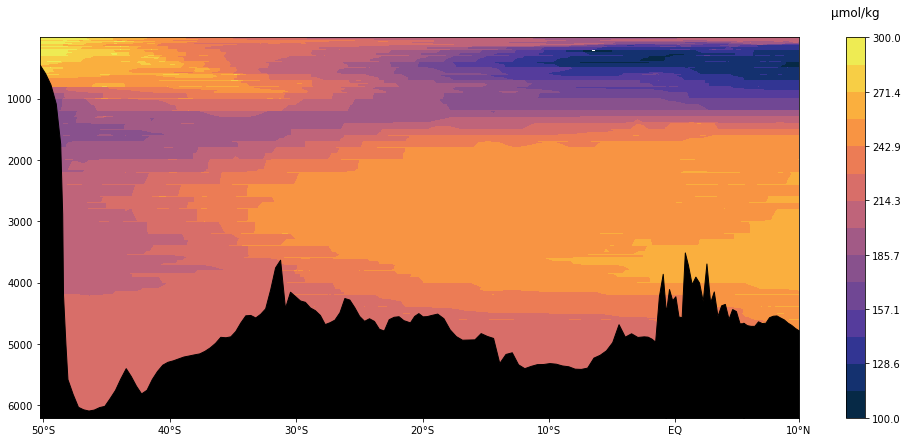

In [15]:
from palettable import cmocean

cmap = cmocean.sequential.Thermal_15.mpl_colormap


fig, ax = plt.subplots(figsize=(17, 7))

levels = np.linspace(100, 300, 15)

ax.invert_yaxis()
cs = ax.contourf(latitudes, z, filled, cmap=cmap, vmin=100, vmax=300, levels=levels)
cbar = fig.colorbar(cs, extend="both", spacing="proportional")
cbar.ax.set_title("µmol/kg\n")
ax.fill_between(latitudes, depths, y2=max(z), color="black", zorder=99)

vals = [-50, -40, -30, -20, -10, 0, 9.751]
labels = ["50°S", "40°S", "30°S", "20°S", "10°S", "EQ", "10°N"]
plt.xticks(vals, labels, color="k");

fig.savefig("A17-oxygen-section.png")
fig.savefig("A17-oxygen-section.svg")

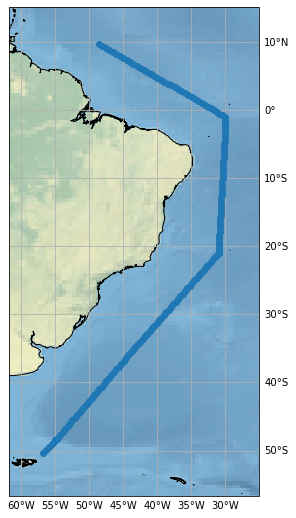

In [16]:
import cartopy.crs as ccrs

fig, ax = plt.subplots(
    figsize=(9, 9), subplot_kw={"projection": ccrs.PlateCarree()}
)

ax.plot(longitudes, latitudes, "o")
ax.stock_img()
ax.coastlines("10m")

dx = dy = 5
ax.set_extent(
    [
        min(longitudes)-dx,
        max(longitudes)+dx,
        min(latitudes)-dy,
        max(latitudes)+dy,
    ]
)

gl = ax.gridlines(draw_labels=True)
gl.left_labels = gl.top_labels = False
fig.savefig("A17-cruise-map.png")
fig.savefig("A17-cruise-map.svg")